In [2]:
import yfinance as yf 
import pandas
btc = yf.download("BTC-USD" , start = "2021-01-01", end = "2025-06-1", interval = "1d")
btc.head()

/var/folders/ph/8101ptr551z8pcbjb0sd3j_h0000gn/T/ipykernel_2784/1353324527.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download("BTC-USD" , start = "2021-01-01", end = "2025-06-1", interval = "1d")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2021-01-01,29374.152344,29600.626953,28803.585938,28994.009766,40730301359
2021-01-02,32127.267578,33155.117188,29091.181641,29376.455078,67865420765
2021-01-03,32782.023438,34608.558594,32052.316406,32129.408203,78665235202
2021-01-04,31971.914062,33440.218750,28722.755859,32810.949219,81163475344
2021-01-05,33992.429688,34437.589844,30221.187500,31977.041016,67547324782


In [3]:
import pandas as pd
btc.isnull().sum()

btc = btc.dropna()

btc.index = pd.to_datetime(btc.index)

btc = btc.sort_index()

btc.info()
btc.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1612 entries, 2021-01-01 to 2025-05-31
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   1612 non-null   float64
 1   (High, BTC-USD)    1612 non-null   float64
 2   (Low, BTC-USD)     1612 non-null   float64
 3   (Open, BTC-USD)    1612 non-null   float64
 4   (Volume, BTC-USD)  1612 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 75.6 KB


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,1612.000000,1612.000000,1612.000000,1612.000000,1.612000e+03
mean,47453.418188,48419.093596,46347.886309,47409.187998,3.415876e+10
std,23517.036854,23926.560743,23027.542045,23479.093336,2.128312e+10
min,15787.284180,16253.047852,15599.046875,15782.300781,5.331173e+09
25%,28177.442383,28619.345215,27657.720215,28173.851562,2.014570e+10
50%,42481.878906,43288.763672,41681.138672,42435.220703,2.991008e+10
75%,61825.688477,63215.354492,60468.112305,61743.574219,4.162240e+10
max,111673.281250,111970.171875,109285.070312,111679.359375,3.509679e+11


In [4]:
window = 20  # window set to 20
btc.columns = btc.columns.get_level_values(0)  # 把 MultiIndex 變成單層
btc["Return"] = btc["Close"].pct_change()   # creating keys in dictionary
btc["MA20"] = btc["Close"].rolling(window).mean()
btc["BB_upper"] = btc["MA20"] + 2 * btc["Close"].rolling(window).std()
btc["BB_lower"] = btc["MA20"] - 2 * btc["Close"].rolling(window).std()
btc["Volatility20"] = btc["Return"].rolling(window).std()  # how did you claculate that
btc["MaxDrawdown"] = (btc["Close"] / btc["Close"].cummax()) - 1 


Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Return', 'MA20', 'BB_upper',
       'BB_lower', 'Volatility20', 'MaxDrawdown'],
      dtype='object', name='Price')


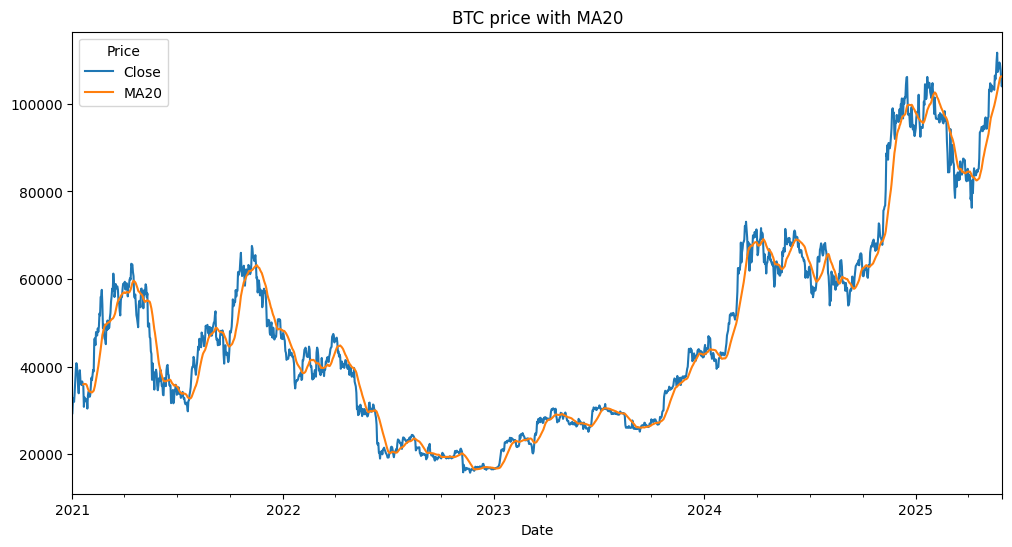

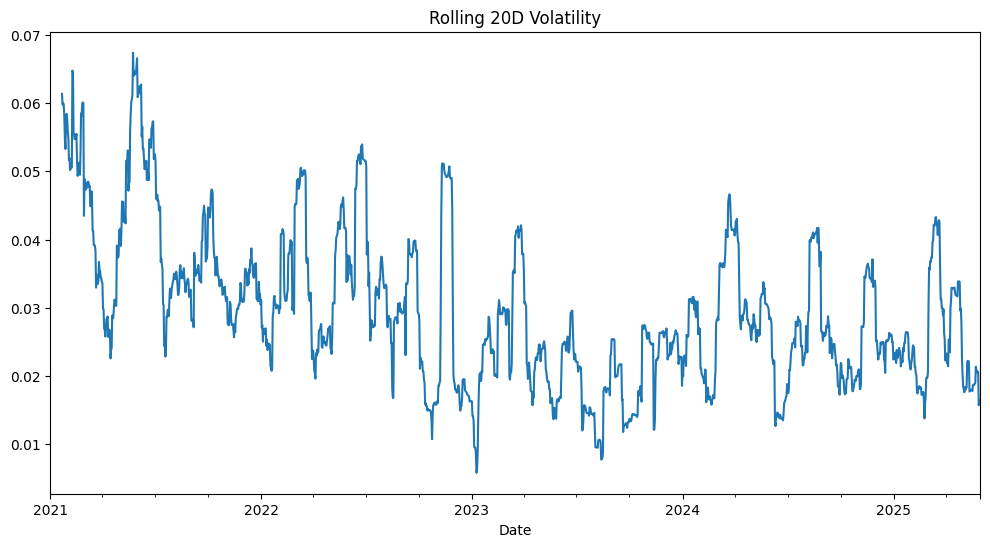

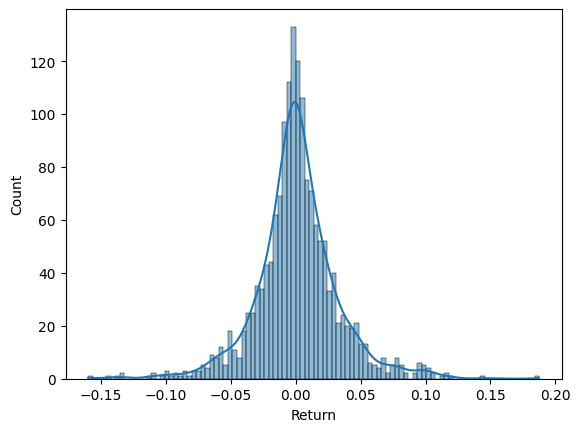

<Axes: title={'center': 'Max Drawdown'}, xlabel='Date'>

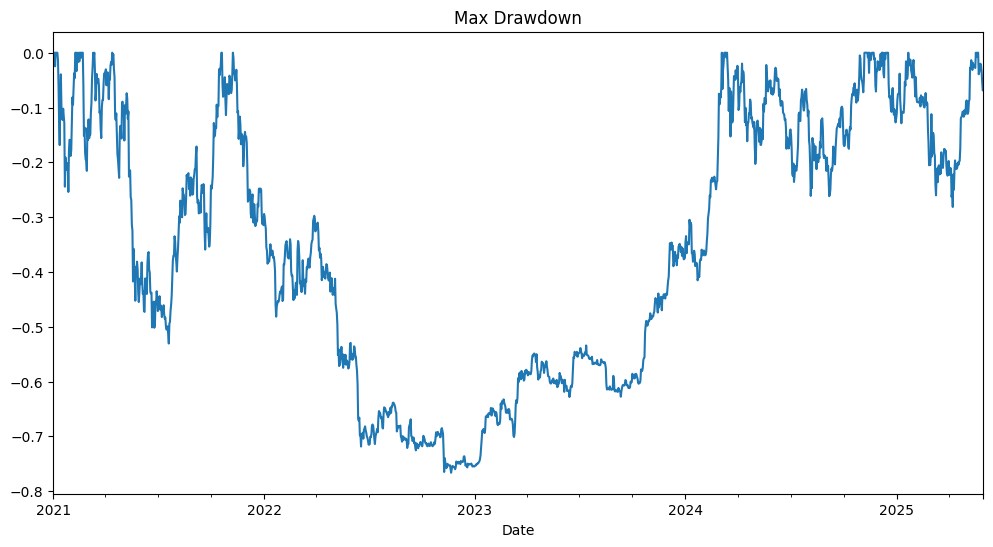

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

if isinstance(btc.columns, pd.MultiIndex):
    btc.columns = btc.columns.get_level_values(0)
print(btc.columns)

btc[["Close", "MA20"]].plot(figsize = (12, 6), title = "BTC price with MA20")
plt.show()
btc["Volatility20"].plot(figsize = (12, 6), title = "Rolling 20D Volatility")
plt.show()
sns.histplot(btc["Return"].dropna(), bins = 100, kde = True)
plt.show()
btc["MaxDrawdown"].plot(figsize = (12, 6), title = "Max Drawdown")





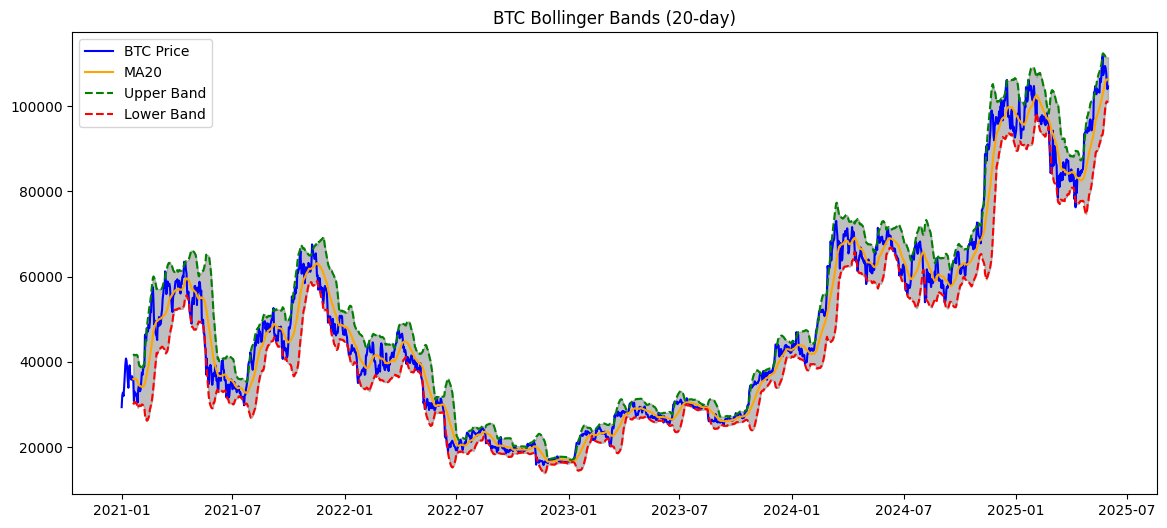

In [6]:
plt.figure(figsize=(14, 6))
plt.plot(btc["Close"], label = "BTC Price", color = 'blue')
plt.plot(btc["MA20"], label = "MA20", color = 'orange')
plt.plot(btc["BB_upper"], label = "Upper Band", linestyle = '--', color = 'green')
plt.plot(btc["BB_lower"], label = "Lower Band", linestyle = '--', color = 'red')
plt.fill_between(btc.index, btc["BB_upper"], btc["BB_lower"], color = 'gray', alpha = 0.5)
plt.title("BTC Bollinger Bands (20-day)")
plt.legend()
plt.show()


In [7]:
high_low = btc["High"] - btc["Low"]
high_close = (btc["High"] - btc["Close"].shift()).abs()
low_close = (btc["Low"] - btc["Close"].shift()).abs()
true_range = pd.concat([high_low, high_close, low_close], axis = 1).max(axis = 1)

btc["ATR20"] = true_range.rolling(window).mean()

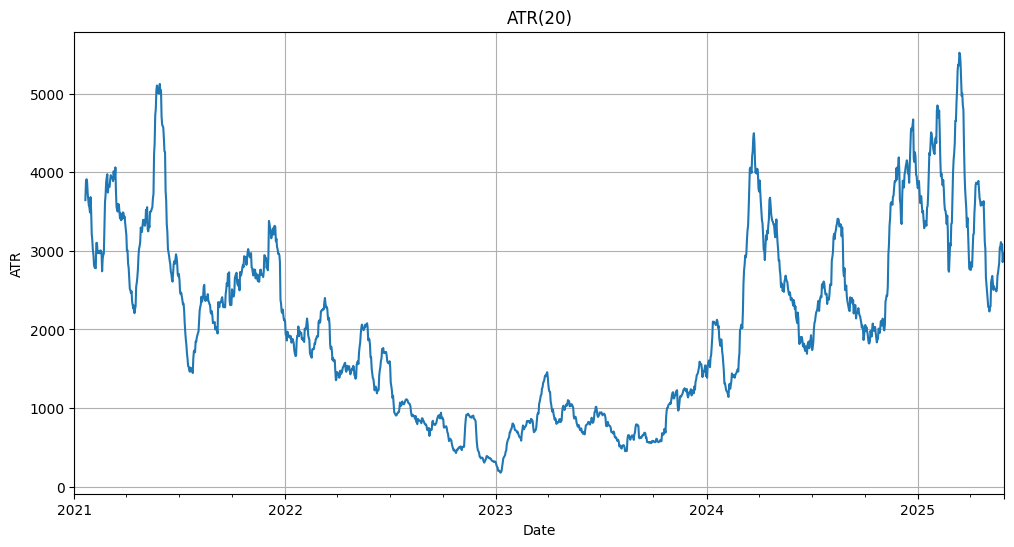

In [8]:

btc["ATR20"].plot(figsize=(12,6), title = "ATR(20)")
plt.ylabel("ATR")
plt.xlabel("Date")
plt.grid(True)
plt.show()

In [8]:
#* 最近一年波動率是否上升？ 最近一年的波動率比較低（0.016左右））
#* 最大跌幅何時發生？   最大跌幅在2022年尾的時候發生的（可能是因為疫情？）
#* 均線是否有效追蹤趨勢？ （均線非常貼合趨勢）
#* 是否適合接下來嘗試策略回測？ 當然可以，資料都是整理過的